## Challenge Scenario:
Consider a scenario where you work for a social network company for academics. This social network includes full professors, assistant professors, postdoctoral students, graduate students and others as members. To increase engagement and interaction among the members of this academic community, your product manager wants to roll out a feature that ranks members in the network according to the number of times other people have viewed their social profiles.Working as the data team’s point person on this project, you are responsible for pulling together and manipulating relevant data to advise the product manager on how the data can drive this new feature forward.


## Solution Steps:

### Part-I
### 1) Answer Project Manager's Questions
      1.1) What is the average age of users by region?
      1.2) Could you provide a breakdown of user title and number of user counts associated with each title?
      1.3) Who is the top viewed user, based on internal profile views?
      1.4) Can you provide a ranked list of the top 10 most viewed users based on internal profile views,                  supplemented with data from the user table?
      1.5) Which region gets the most viewed users (based on internal profile views)?
      
### Part II
### 2) Develop "Rank for profile views" feature
      2.1) Understanding interaction among users
          2.1.1) are users more interested in other users within the same Region ?
          2.1.2) do users interact with other users who are in similar age group ?
          2.1.3) do users prefer to connect another users with same title or not?
          2.1.4) what's in the name ? 
          2.1.5) During which time of the day users are most active ?
          
      2.2) External Web Traffice on user profiles 
          2.2.1) Finding Missing Necessary information for External_Profile_Views
          2.2.2) Users from which region gets the most extenal views ?
          2.2.3) Which title gets more external attention ?
          2.2.4) Which age group gets most external traffic ?
          
      2.3) Ranks for user profile views     
      
### Part III      
### 3) Summary
      3.1) Important Insights
      3.2) Improvements in data
      3.3) Moving ahead with product development
---


#### Import Libraries Connect to the Doximit 'Analyst' database

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import collections
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline 

try: 
    #connection = mysql.connector.connect(user='', password='',host='',port=,database='')
    cursor=connection.cursor(buffered=True)
    
except:
    print("Error!! Not able to connect!!")

### 1) Answer Project Manager's Questions
###      1.1) What is the average age of users by region?

In [29]:
query=("SELECT region,Avg(age) as Average_Age FROM users GROUP BY region")
cursor.execute(query)
Avg_Age=pd.DataFrame(cursor.fetchall()[1:],columns=['region','avg_age'])
Avg_Age

,region,avg_age
0,Midwest,38.1995
1,Northeast,36.6343
2,Other,38.0028
3,South,37.9134
4,West,37.0780


#### Let's have a look at distribuiton of age feature with respect to regions 

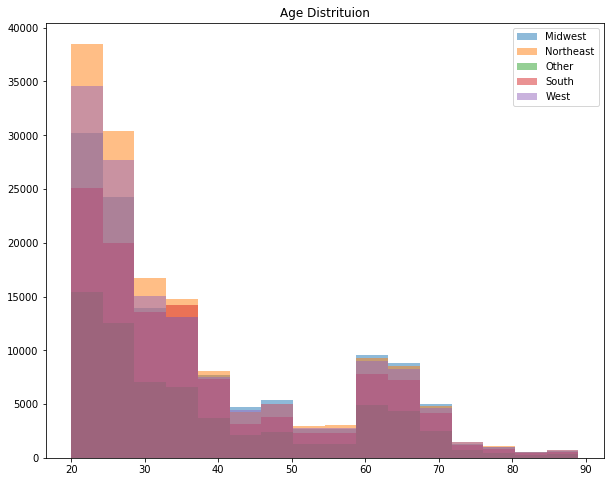

In [30]:
query=("SELECT region, age FROM users")
cursor.execute(query)
data=pd.DataFrame(cursor.fetchall()[1:],columns=['region','age'])
bins=16
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.hist(data['age'][data['region']=='Midwest'], bins, alpha=0.5, label='Midwest')
plt.hist(data['age'][data['region']=='Northeast'], bins, alpha=0.5, label='Northeast')
plt.hist(data['age'][data['region']=='Other'], bins, alpha=0.5, label='Other')
plt.hist(data['age'][data['region']=='South'], bins, alpha=0.5, label='South')
plt.hist(data['age'][data['region']=='West'], bins, alpha=0.5, label='West')
plt.legend(loc='upper right')
plt.title("Age Distrituion")
plt.show()
plt.close()

age histograms for all regions have very similar distriubtion where majority of users are aged between 20-30 years & number of users get decresed as the age increases. Interesting thing to notice that for each region we see a rise in users when age is above 59 & then again decresing trend continues after age of 64-65 years.

### 1.2) Could you provide a breakdown of user title and number of user counts associated with each title?

In [31]:
query=("SELECT title, count(*) from user_titles inner join users on users.title_id=user_titles.id group by user_titles.title")
cursor.execute(query)
data=pd.DataFrame(cursor.fetchall(),columns=['Title','Count'])
data

,Title,Count
0,Assistant professor,41977
1,Full professor,18907
2,Other,71231
3,Postdoctoral assistant,193847
4,Student,274038


#### Lets see the share of each title in user base

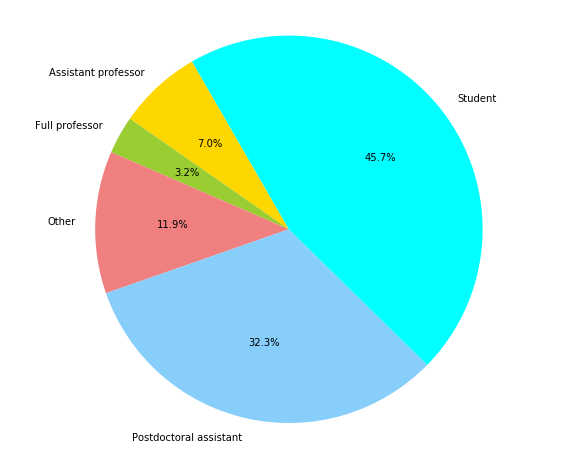

In [32]:
plt.pie(data['Count'],labels = data['Title'], colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan'], autopct='%1.1f%%', startangle=120) 
plt.axis('equal')
plt.show()

interesting thing to see here is 79% of our users are student+postdoctoral_assitants

### 1.3) Who is the top viewed user, based on internal profile views?

In [33]:
query=("select viewed_user_id,firstname,lastname,count(viewed_user_id) as views from internal_profile_views inner join users on viewed_user_id=users.id group by viewed_user_id order by views desc limit 1 ")
cursor.execute(query)
data=pd.DataFrame(cursor.fetchall(),columns=['User-ID','First Name','Last Name','Internal_Profile_Views'])
data

,User-ID,First Name,Last Name,Internal_Profile_Views
0,1740253,Tommy,Proulx,406


###  1.4) Can you provide a ranked list of the top 10 most viewed users based on internal profile views,                  supplemented with data from the user table?

In [34]:
query=("select viewed_user_id,firstname,lastname,age,region,count(viewed_user_id) as views from internal_profile_views inner join users on viewed_user_id=users.id group by viewed_user_id order by views desc limit 10 ")
cursor.execute(query)
data=pd.DataFrame(cursor.fetchall(),columns=['User-ID','First Name','Last Name','age','region','Views'])
data

,User-ID,First Name,Last Name,age,region,Views
0,1740253,Tommy,Proulx,20,Northeast,406
1,2185215,Adam,Towns,21,Midwest,383
2,2632343,Diane,Holland,24,South,180
3,1287442,Edna,Castillo,29,Midwest,88
4,3086119,Savannah,Murphy,21,Northeast,88
5,2460133,Shirley,Medina,60,Midwest,82
6,979614,Sandra,Phillips,67,Midwest,68
7,218859,Howard,Rivera,27,Midwest,67
8,314218,Robert,Barron,65,South,61
9,2864377,Kathy,Saeteun,68,Midwest,47


#### Lets visualize results in a bar chart

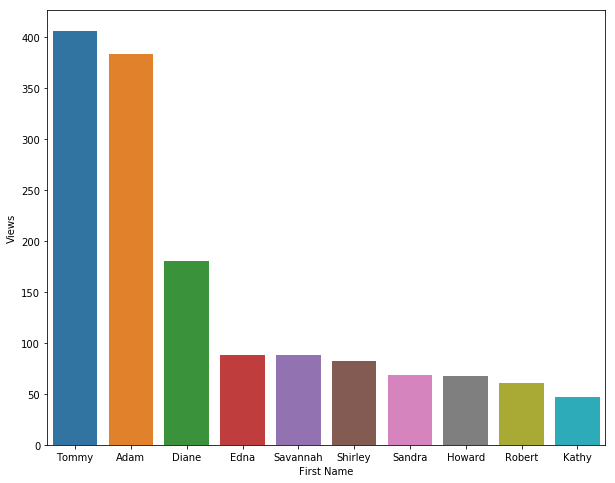

In [35]:
sns.barplot(x='First Name',y='Views',data=data)
plt.show()

###  1.5) Which region gets the most viewed users (based on internal profile views)?

In [36]:
query=("select region,count(viewed_user_id) as views from internal_profile_views inner join users on viewed_user_id=users.id group by region order by views desc")
cursor.execute(query)
data=pd.DataFrame(cursor.fetchall(),columns=['Region','Views'])
data

,Region,Views
0,Midwest,2908
1,Northeast,2780
2,South,2332
3,West,1951
4,Other,835


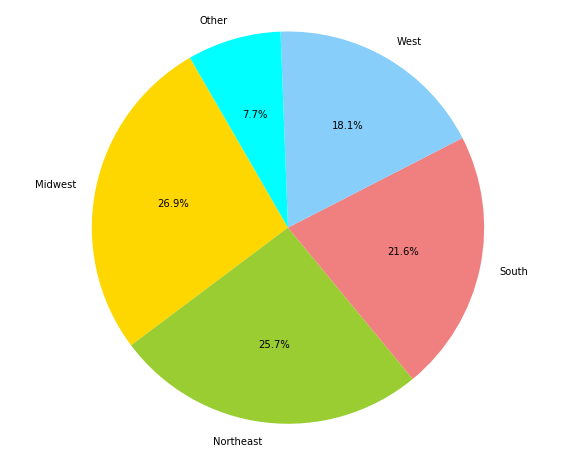

In [37]:
plt.pie(data['Views'],labels = data['Region'], colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan'], autopct='%1.1f%%', startangle=120) 
plt.axis('equal')
plt.show()

Top two regions which are Most viewed users(internal profile views) are Midewest & Northeast. 

### 2) Develop "Rank for profile views" feature
###      2.1) Understanding interaction among users
---
###               2.1.1) are users more interested in other users within the same Region ?

In [38]:
import itertools 
query=("select internal_profile_views.id,user_id,region,age,title_id from internal_profile_views left join users on user_id=users.id")
cursor.execute(query)
viewer=pd.DataFrame(cursor.fetchall(),columns=['IPV_id','viewer','viewer_region','viewer_age','viewer_title'])

query=("select internal_profile_views.id,viewed_user_id,region,age,title_id from internal_profile_views left join users on viewed_user_id=users.id")
cursor.execute(query)
viewed=pd.DataFrame(cursor.fetchall(),columns=['IPV_id','viewed','viewed_region','viewed_age','viewed_title'])


data=viewer.merge(viewed,on='IPV_id')

data['viewer_title'][data['viewer_title']==2]='Ass.Prof.'
data['viewer_title'][data['viewer_title']==1]='Full prof.'
data['viewer_title'][data['viewer_title']==6]='Other'
data['viewer_title'][data['viewer_title']==3]='PD.Ast.'
data['viewer_title'][data['viewer_title']==5]='Student'

data['viewed_title'][data['viewed_title']==2]='Assistant Professor'
data['viewed_title'][data['viewed_title']==1]='Full professor'
data['viewed_title'][data['viewed_title']==6]='Other'
data['viewed_title'][data['viewed_title']==3]='Postdoctoral Assistant'
data['viewed_title'][data['viewed_title']==5]='Student'



data_dict={}
for viewer_region,viewed_region in list(itertools.permutations(data['viewer_region'].unique(), 2)):
    data_dict[viewer_region+'_'+viewed_region]=float(len(data[(data['viewer_region']==viewer_region) & (data['viewed_region']==viewed_region)])/float(len(data[data["viewer_region"]==viewer_region])))*100
    
for same_region in data['viewer_region'].unique():
    data_dict[same_region+'_'+same_region]=(len(data[(data['viewer_region']==same_region) & (data['viewed_region']==same_region)])/float(len(data[data["viewer_region"]==viewer_region])))*100

data_dict=collections.OrderedDict(sorted(data_dict.items()))

temp=pd.DataFrame(columns=['Region','viewed_region','Percentage'])
temp['Region']=['Midwest','Midwest','Midwest','Midwest','Midwest','Northeast','Northeast','Northeast','Northeast','Northeast',
                'Other','Other','Other','Other','Other','South','South','South','South','South','West','West','West','West','West']

temp_list=[]
for key in data_dict.keys():
    temp_list.append(key.split('_')[1])

temp['viewed_region']=temp_list
temp['Percentage']=data_dict.values()
temp.head()

,Region,viewed_region,Percentage
0,Midwest,Midwest,24.136637
1,Midwest,Northeast,23.775934
2,Midwest,Other,7.966805
3,Midwest,South,23.112033
4,Midwest,West,18.464730


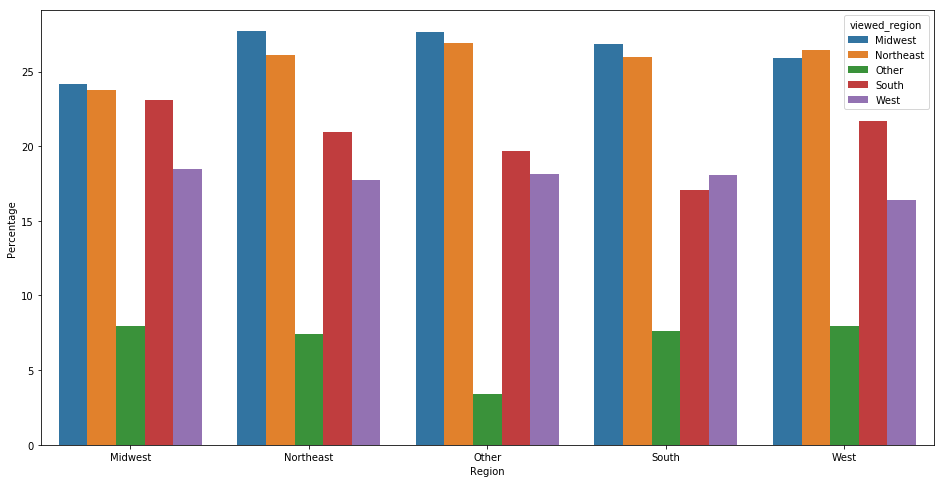

In [39]:
#Creating Visualization
fig, (ax) = plt.subplots(1,1,figsize=(16,8))
sns.barplot(x='Region',y='Percentage', hue="viewed_region", data=temp,ax=ax)
plt.show()

#### User's from every region seems interested in Northwest & Midwest (biasness toward these regions could be the result of "our dataset having more records for these region ")

### 2.1.2) do users interact with other users who are in similar age group ?

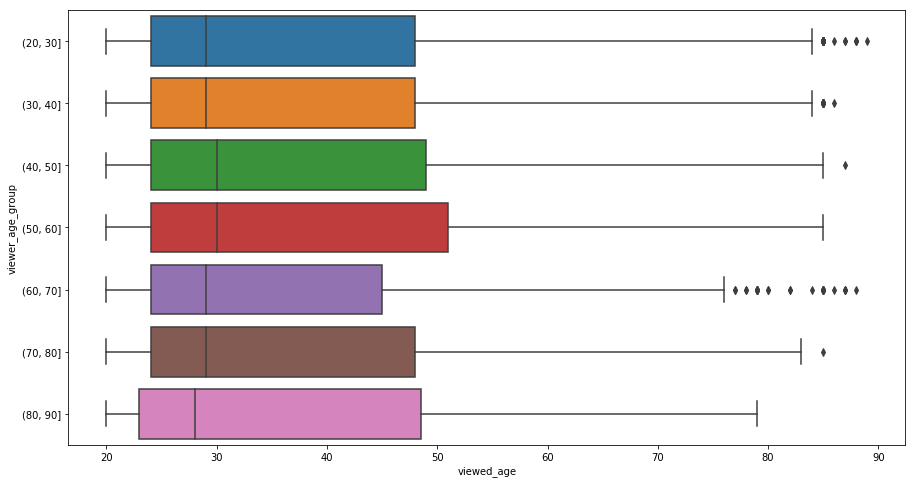

In [40]:
fig, (ax) = plt.subplots(1,1,figsize=(15,8))
bins = [20, 30, 40, 50, 60, 70, 80,90]
data['viewer_age_group'] = pd.cut(data['viewer_age'], bins)
sns.boxplot(y=data['viewer_age_group'],x=data['viewed_age'],ax=ax)

#### we don't see major biasness depending on the age group

### 2.1.3) do users prefer to connect another users with same title or not?

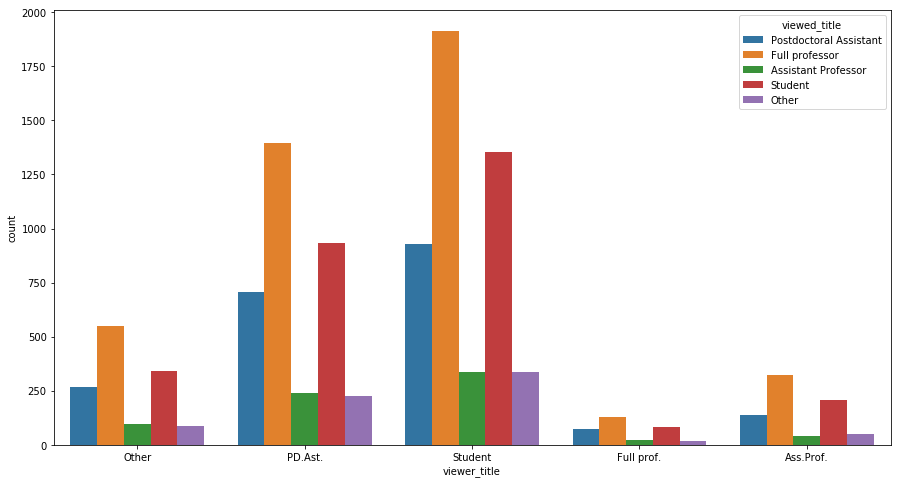

In [41]:
fig, (ax) = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='viewer_title', hue="viewed_title", data=data,ax=ax)
plt.show()

#### Most of the users(all titles) are interested in Full Professor's profiles

### 2.1.4) what's in the name ? 
In many countries last name of person represents the cast or religion or ethnic group of a person, It would be really interesting to see if the the users are trying to view & connect with other users having same lastname. 

In [42]:
query=("select internal_profile_views.id,user_id,lastname,created_at from internal_profile_views inner join users on users.id=user_id")
cursor.execute(query)
viewer_lname=pd.DataFrame(cursor.fetchall(),columns=['IPV_id','viewer','viewer_lname','timestamp'])

query=("select internal_profile_views.id,viewed_user_id,lastname from internal_profile_views inner join users on users.id=viewed_user_id")
cursor.execute(query)
viewed_lname=pd.DataFrame(cursor.fetchall(),columns=['IPV_id','viewed','viewed_lname'])

combined=viewer_lname.merge(viewed_lname,on='IPV_id')
combined[combined['viewer_lname']==combined['viewed_lname']]

,IPV_id,viewer,viewer_lname,timestamp,viewed,viewed_lname
198,3343,71554,Smith,2014-01-01 19:49:13,3517304,Smith
211,4591,72053,Smith,2014-01-01 02:52:34,2075696,Smith
4194,2860,1643975,Rodriguez,2014-01-01 17:13:20,2515562,Rodriguez
4395,9468,1709560,Lee,2014-01-01 13:49:50,1292683,Lee
4745,10224,1834789,Brooks,2014-01-01 02:01:18,1298196,Brooks
5066,5007,1976553,Malley,2014-01-01 05:10:23,3352668,Malley
8133,10237,3272052,Brown,2014-01-01 02:06:56,3459491,Brown
8317,8823,3341452,Clark,2014-01-01 10:17:58,969366,Clark


#### only 8 lastname matchs found,but it would be good to consider this analysis on a much larger dataset.

### 2.1.5) During which hours users are most active ?
It would be nice to also see the distibution of user views based on months & days but In our dataset most of views are recoded on 2014-01-01(single day) so it won't be useful

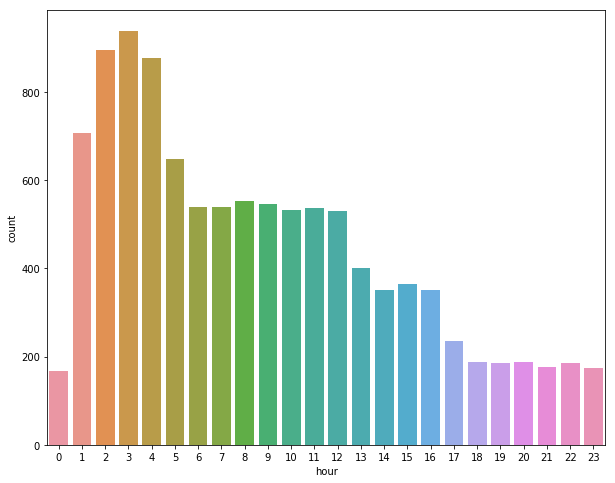

In [43]:
combined['hour'] = combined['timestamp'].dt.hour
sns.countplot(combined['hour'])
plt.show()

Interesting!! most views are recoded in the night (1 am to 5am). We expected to see a different pattern.

### 2.2) Web Traffice on user profiles 
In this part we will concentract on external traffice which is comming from outside our social network.
challege here is that under the external_profile_view we don't have user_id & in order fetch key details about
user we need help of other available data tables so we will try to find out user_id by joining this table
with user_profile_urls.
Offcourse ther will be some data loss where profile_url & public_profile_url are not same but since time 
is constraint we will move ahead with this strategy.

### 2.2.1) Finding Missing Necessary information for External_Profile_Views

In [44]:
query=("select user_id,public_profile_url,unique_PageViews from external_profile_views inner join user_profile_urls on profile_url=public_profile_url")
cursor.execute(query)
data_external=pd.DataFrame(cursor.fetchall(),columns=['User-ID','url','View_count'])
query=("select * from users")
cursor.execute(query)
data_users=pd.DataFrame(cursor.fetchall(),columns=['User-ID','firstname','lastname','age','region','title'])
data_users['title'][data_users['title']==2]='Ass.Prof.'
data_users['title'][data_users['title']==1]='Full prof.'
data_users['title'][data_users['title']==6]='Other'
data_users['title'][data_users['title']==3]='PD.Ast.'
data_users['title'][data_users['title']==5]='Student'
data=data_external.merge(data_users,on='User-ID')
bins = [20, 30, 40, 50, 60, 70, 80,90]
data['age_group'] = pd.cut(data['age'], bins)
data=data.sort_values(by=['View_count'],ascending=False)
External_data=data
data.head(10)

,User-ID,url,View_count,firstname,lastname,age,region,title,age_group
193057,2871984,/pub/patricia-valenzuela,1124,Patricia,Valenzuela,44.0,Other,Student,"(40, 50]"
193058,3172400,/pub/patricia-valenzuela,1124,Patricia,Valenzuela,29.0,Northeast,Full prof.,"(20, 30]"
193841,3197557,/cv/clayton-ritchie,764,Clayton,Ritchie,85.0,Midwest,Full prof.,"(80, 90]"
222207,3766973,/cv/jose-vawter,506,Jose,Vawter,26.0,South,Ass.Prof.,"(20, 30]"
183428,2960427,/pub/peter-montgomery,496,Peter,Montgomery,31.0,South,Full prof.,"(30, 40]"
167677,2619727,/cv/arthur-parks,431,Arthur,Parks,76.0,Northeast,Other,"(70, 80]"
132454,1933239,/cv/gloria-tilley,428,Gloria,Tilley,26.0,West,Student,"(20, 30]"
168510,2644348,/pub/pam-porada,399,Pam,Porada,22.0,Midwest,Ass.Prof.,"(20, 30]"
151003,2297959,/pub/chris-mccullough,373,Chris,Mccullough,22.0,Northeast,Student,"(20, 30]"
75711,999089,/cv/valerie-vasquez,367,Valerie,Vasquez,22.0,South,Full prof.,"(20, 30]"


#### was there any data loss !!

In [45]:
# for how many users we are not able to identify  id 
query=("select count(id) from external_profile_views")
cursor.execute(query)
ndata=cursor.fetchall()[0][0]
loss=(ndata-len(data_external))
print("users for whom we got user_id & other feature details",len(data_external))
print("actual users in external_profile_views table",ndata)
print("loss",loss)

('users for whom we got user_id & other feature details', 249048)
('actual users in external_profile_views table', 335636)
('loss', 86588)


#### could we saved more data: 
Yes,we can further reduce loss by breaking up profile url (for missing user_ids) & fetching the name & finding id's by joining with users table but that will require lot of extra effor & we have limited time!

### 2.2.2) Users from which region gets the most extenal views ?

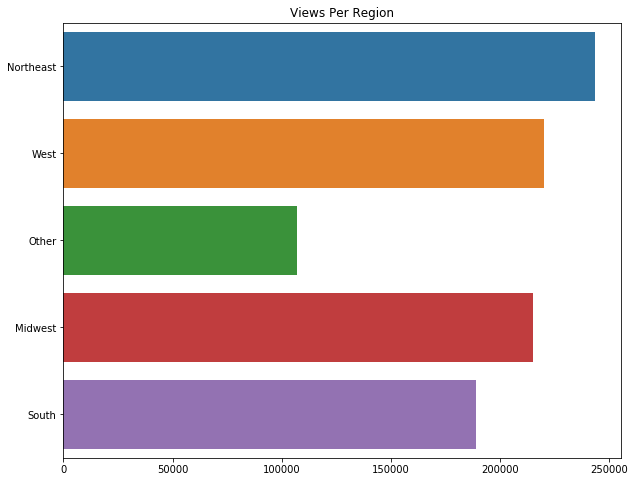

In [49]:
data_dict={}
for region in data['region'].unique():
    data_dict[region]=(data['View_count'][data['region']==region].sum())
plt.title("Views Per Region")
sns.barplot(data_dict.values(),data_dict.keys(),orient='h')
plt.show()

### 2.2.3) Which title gets more external attention ?

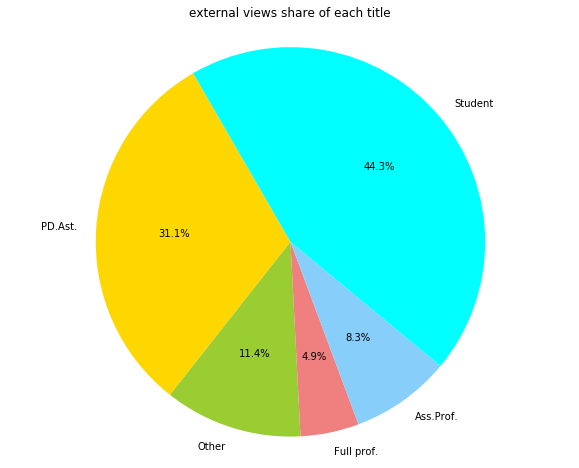

In [50]:
data_dict={}
for title in data['title'].unique():
    data_dict[title]=data['View_count'][data['title']==title].sum()

plt.pie(data_dict.values(),labels = data_dict.keys(), colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan'], autopct='%1.1f%%', startangle=120) 
plt.title("external views share of each title")
plt.axis('equal')
plt.show()

### 2.2.4) Which age group gets most external traffic ?

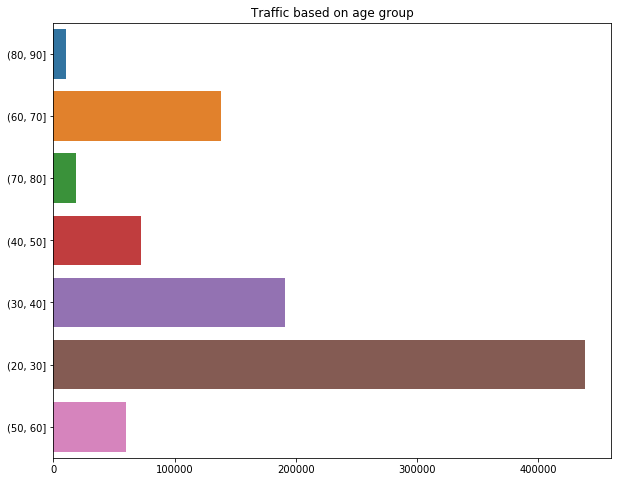

In [51]:
data_dict={}
for age in data['age_group'].unique():
    data_dict[age]=data['View_count'][data['age_group']==age].sum()
plt.title("Traffic based on age group")
sns.barplot(data_dict.values(),data_dict.keys(),orient='h')
plt.show()

### 2.3) Ranks for user profile views  
To assigne a rank to each user for profile views I will considering both internal & external views. the most simple model will be take the sum of both internal & external views and assign the user with the rank according to total views.
### but in more practicel scenario we need to consider some other factor's in account such as "how active user is on social media as compare to connections, How much time other users spent while viewing profile or reading articles posted by a perticular user, How often users return to follow up with the new posts of a perticular user, Is user able to get views from diverse region,occupation users etc."
---

#### Lets fetch the data for Internal & External profile views

In [52]:
query=("select viewed_user_id,firstname,lastname,age,region,count(viewed_user_id) as views from internal_profile_views inner join users on viewed_user_id=users.id group by viewed_user_id order by views desc")
cursor.execute(query)
Internal_data=pd.DataFrame(cursor.fetchall(),columns=['User-ID','First Name','Last Name','age','region','Views'])
Internal_data=Internal_data.sort_values(by='Views',ascending=False)
External_data=External_data.sort_values(by='View_count',ascending=False)
from IPython.display import display
print("Internal view Data")
display(Internal_data.head())
print("-----------------------------------------------------------------------")
print("External view Data")
display(External_data.head())

Internal view Data


,User-ID,First Name,Last Name,age,region,Views
0,1740253,Tommy,Proulx,20,Northeast,406
1,2185215,Adam,Towns,21,Midwest,383
2,2632343,Diane,Holland,24,South,180
3,1287442,Edna,Castillo,29,Midwest,88
4,3086119,Savannah,Murphy,21,Northeast,88


-----------------------------------------------------------------------
External view Data


,User-ID,url,View_count,firstname,lastname,age,region,title,age_group
193057,2871984,/pub/patricia-valenzuela,1124,Patricia,Valenzuela,44.0,Other,Student,"(40, 50]"
193058,3172400,/pub/patricia-valenzuela,1124,Patricia,Valenzuela,29.0,Northeast,Full prof.,"(20, 30]"
193841,3197557,/cv/clayton-ritchie,764,Clayton,Ritchie,85.0,Midwest,Full prof.,"(80, 90]"
222207,3766973,/cv/jose-vawter,506,Jose,Vawter,26.0,South,Ass.Prof.,"(20, 30]"
183428,2960427,/pub/peter-montgomery,496,Peter,Montgomery,31.0,South,Full prof.,"(30, 40]"


#### Lets fetch the data for External profile views

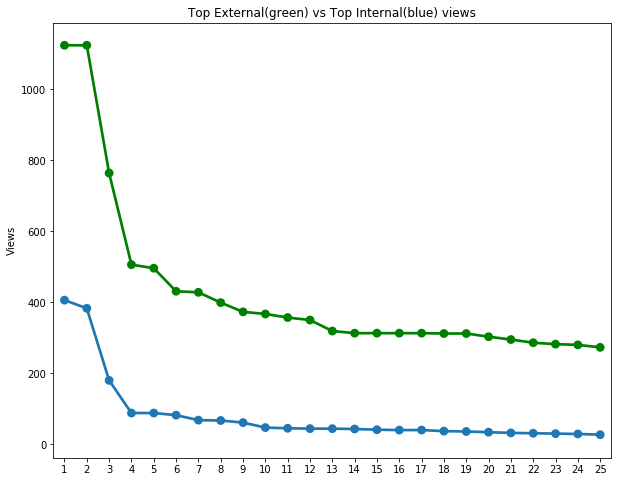

In [53]:
plt.title('Top External(green) vs Top Internal(blue) views')
Top_Views=range(1,26)
sns.pointplot(Top_Views,External_data['View_count'][0:25],color='green')
sns.pointplot(Top_Views,Internal_data['Views'][0:25])
plt.show()

### Now we are going to combine internal_views & external views DataFrame & create a new RANK feature(Higher Rank means Good) which is sum of the both internal & external views (if any of these views data is missing for any use we will assume it as 0)

In [54]:
#create an empty View_Rank DataFrame
View_Rank=pd.DataFrame(columns=['User-ID','Rank'])
#Initialize all Rank to 0
View_Rank['Rank']=np.zeros(600001)
View_Rank
#get all the user-ids
query=("select id from users")
cursor.execute(query)
temp=pd.DataFrame(cursor.fetchall(),columns=['id'])
View_Rank['User-ID']=temp

In [55]:
View_Rank=pd.merge(View_Rank,Internal_data,on='User-ID',how='left')
View_Rank['Internal_views']=View_Rank['Views']
del View_Rank['First Name']
del View_Rank['Last Name']
del View_Rank['age']
del View_Rank['region']
del View_Rank['Views']

View_Rank=pd.merge(View_Rank,External_data,on='User-ID',how='left')
View_Rank['External_views']=View_Rank['View_count']
del View_Rank['url']
del View_Rank['View_count']
del View_Rank['firstname']
del View_Rank['lastname']
del View_Rank['age']
del View_Rank['region']
del View_Rank['title']
del View_Rank['age_group']

View_Rank=View_Rank.fillna(0)
View_Rank['Rank']=View_Rank['Internal_views']+View_Rank['External_views']
View_Rank=View_Rank.sort_values(by=['Rank'],ascending=False)
View_Rank = View_Rank.reset_index(drop=True)
View_Rank.head(10)

,User-ID,Rank,Internal_views,External_views
0,2871984,1124.0,0.0,1124.0
1,3172400,1124.0,0.0,1124.0
2,3197557,764.0,0.0,764.0
3,3766973,506.0,0.0,506.0
4,2960427,496.0,0.0,496.0
5,2619727,431.0,0.0,431.0
6,1933239,428.0,0.0,428.0
7,1740253,406.0,406.0,0.0
8,2644348,399.0,0.0,399.0
9,2185215,385.0,383.0,2.0


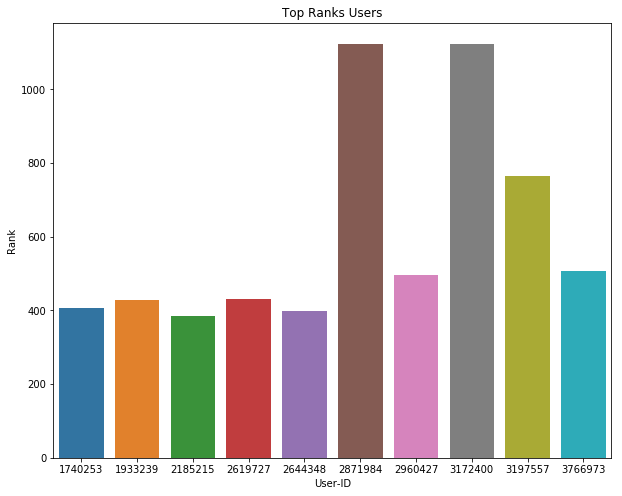

In [56]:
plt.title('Top Ranks Users')
data=pd.DataFrame(columns=['User-ID','Rank'])
data['User-ID']=View_Rank['User-ID'][0:10]
data['Rank']=View_Rank['Rank'][0:10]
sns.barplot(data['User-ID'],data['Rank'])
plt.show()

### 3) Summary
###  3.1) Important Insights

#### -> Age Distribution of users across all 5 region very similar  (1.1 figure)
#### -> 79% of our users are student or postdoctoral_assitants   (1.2 figure)
#### -> User's from Northeast & Midwest are more active & received the most internal views from every region (1.5 figure)
#### -> Users of all age group are interested in other users of all age group (2.1.2 figure)
#### -> Full professor is the most viewed title internally alothough we have only 3.2% of professors in our dataset (2.1.1 figure)
#### -> most views are recoded in the night (1 am to 5am). users are most active from late night to early morning (2.1.5 figure)
#### -> User's from Northeast & West(Midwest is also very close to west) received the most External views from every region (2.2.2 fig)
#### -> Student & PD Asst. are most viewed titles externally (2.2.3 fig)
#### -> age group between 20-30 years brings most external traffic (2.2.4 fig)
#### -> Number of Top External views are way more then Internal views (2.3 fig)
---
## 3.2) Improvements in data

#### -> Most of the internal views data was gather on 2014-01-01, In order to apply time series models to predict user's behaviour we need this data to be collected on continuous & much larger timeline.
#### -> timestamp for external views data.
#### -> Activity logs of each user so that we know which activites of users are drawing more attention or we will know if user is doing someting wrong to get higher rank
#### -> connection details of the users (how long users are connected to each other, how often user is loosing connections, how fast user is gaining new connections )
#### -> How long a visitor stayed on the user's profile
#### -> How interective visitor's are on the posts of a users(ex.- number of comments of visitors on a user's post )
#### -> How responsive a users is on the comments or queries of visitors  (does user respond to visitors )
---
## 3.3) Moving ahead with product development

we need to build a much complex alorithm for calculating the perfect rank for each user. ofcourse external & internal views are important parameter for Rank but we need to develop some more important fetures by collectiong new & more insightful data such as mentioned in 3.2).

so future steps would be :

#### -> collect more meaningful data  (look beyond internal & external views such as activity log)
#### -> ensure correctness & completness of collected data
#### -> build diverse set of Features on top of this data
#### -> Find Importance of each of these features 
#### -> assign weights to each of this features depending on importance (not every feature should contribute equally in calcuating the final rank)
#### -> calculate the final rank feature(example: c1*(feature1)+c2*(feature2)-c3*(feature3)......)
#### -> find out the ways in which a user can cheat our alorithm to gain higher rank
#### -> keep improving our algorithm based on the new data & improvements in social network over time
 
